In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pickle

In [29]:
Data = pd.read_csv('data17features.csv')



In [30]:
Data.head(6)

,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,AIR_INTAKE_TEMP,SPEED,SHORT TERM FUEL TRIM BANK 1,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,failure
0,100.0,54.0,44.3,26.3,16.0,1171.0,43.0,6.09,37.0,7.0,0.0,79.0,28.0,0,0,63.5,1.0,0
1,100.0,55.0,44.3,27.5,16.0,1147.0,42.0,4.52,37.0,2.0,0.0,85.0,26.0,0,0,60.8,1.0,0
2,100.0,56.0,44.3,33.3,16.0,1041.0,45.0,4.87,37.0,0.0,0.0,90.0,25.0,0,0,51.8,1.0,0
3,100.0,57.0,42.0,45.1,16.0,1106.0,41.0,7.63,37.0,13.0,0.0,96.0,30.0,0,0,63.9,1.0,0
4,100.0,57.0,40.0,20.4,16.0,1354.0,56.0,4.56,37.0,17.0,0.0,102.0,28.0,0,0,74.9,1.0,0
5,100.0,58.0,38.0,20.4,16.0,1289.0,40.0,3.86,37.0,4.0,0.0,109.0,24.0,0,0,69.8,1.0,0


In [31]:
Data.tail(3)

,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,AIR_INTAKE_TEMP,SPEED,SHORT TERM FUEL TRIM BANK 1,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,failure
47307,96.0,98.0,0.0,0.0,26.0,788.0,27.0,0.0,54.0,0.0,2.0,0.0,3.0,0,0,53.7,0.0,0
47308,96.0,99.0,0.0,5.5,26.0,769.0,31.0,0.0,54.0,0.0,-6.0,0.0,8.0,0,0,51.4,0.0,0
47309,96.0,100.0,0.0,13.3,26.0,1391.0,27.0,0.0,54.0,0.0,5.0,0.0,10.0,0,0,67.1,0.0,0


In [32]:
Data[222:226]

,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,AIR_INTAKE_TEMP,SPEED,SHORT TERM FUEL TRIM BANK 1,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,failure
222,101.0,83.0,43.1,68.2,16.0,1621.0,99.0,16.63,31.0,43.0,0.0,824.0,55.0,0,0,56.9,0.0,0
223,100.0,82.0,40.4,17.3,16.0,2056.0,61.0,4.35,31.0,46.0,0.0,831.0,24.0,0,0,52.5,1.0,0
224,100.0,83.0,38.0,34.9,16.0,2357.0,63.0,11.29,31.0,41.0,0.0,840.0,31.0,0,0,72.5,1.0,0
225,100.0,84.0,36.9,43.5,16.0,1283.0,65.0,8.38,31.0,41.0,0.0,848.0,30.0,0,0,64.7,1.0,0


In [33]:
# Data info

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47310 entries, 0 to 47309
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BAROMETRIC_PRESSURE(KPA)     47310 non-null  float64
 1   ENGINE_COOLANT_TEMP          47310 non-null  float64
 2   FUEL_LEVEL                   47310 non-null  float64
 3   ENGINE_LOAD                  47310 non-null  float64
 4   AMBIENT_AIR_TEMP             47310 non-null  float64
 5   ENGINE_RPM                   47310 non-null  float64
 6   INTAKE_MANIFOLD_PRESSURE     47310 non-null  float64
 7   MAF                          47310 non-null  float64
 8   AIR_INTAKE_TEMP              47310 non-null  float64
 9   SPEED                        47310 non-null  float64
 10  SHORT TERM FUEL TRIM BANK 1  47310 non-null  float64
 11  ENGINE_RUNTIME               47310 non-null  float64
 12  THROTTLE_POS                 47310 non-null  float64
 13  DTC_NUMBER      

<Axes: >

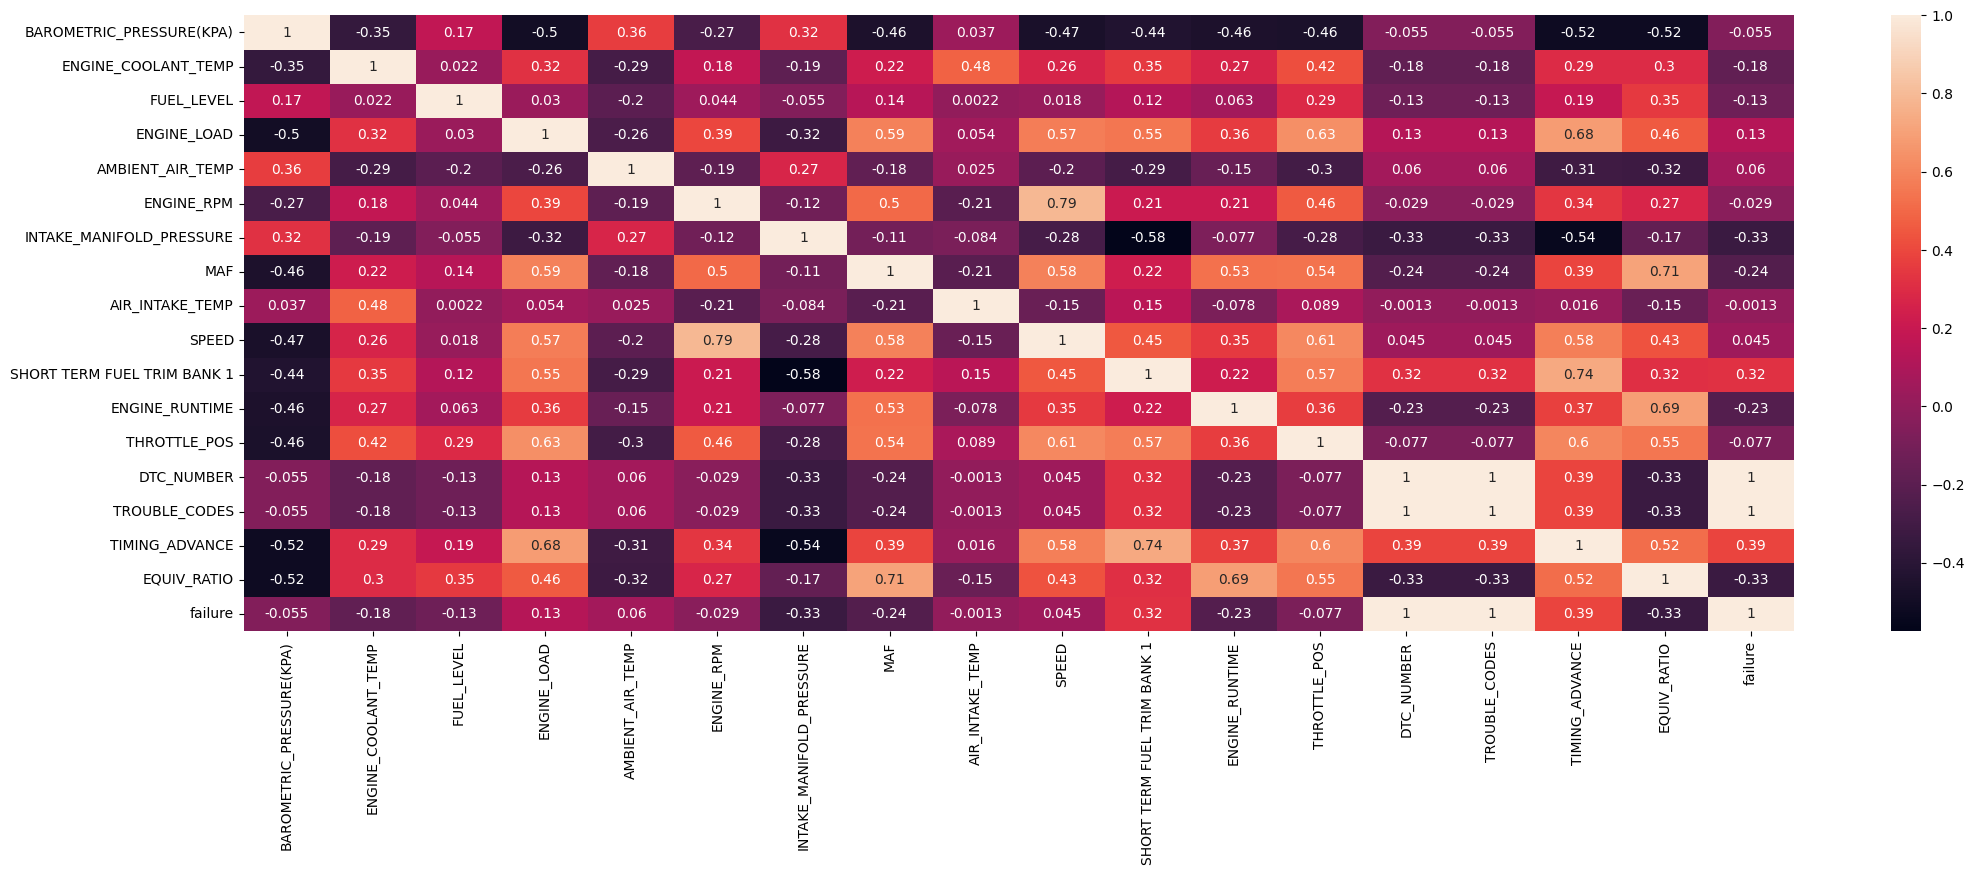

In [34]:
plt.figure(figsize = (25,8))
sns.heatmap(Data.iloc[:,:].corr(),annot=True)

In [35]:
x=Data.drop(['failure'],axis=1)
y=Data['failure']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


#  TRAINING THE MODEL

In [37]:
#  Support Vector Machines
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC()

In [38]:
y_predict_train1= svc_model.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train1)

<Axes: >

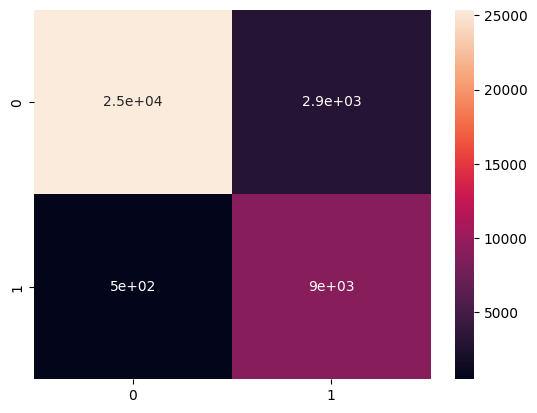

In [39]:
sns.heatmap(cm, annot=True)

In [40]:
print(classification_report(y_train, y_predict_train1))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     28309
           1       0.76      0.95      0.84      9539

    accuracy                           0.91     37848
   macro avg       0.87      0.92      0.89     37848
weighted avg       0.92      0.91      0.91     37848



<Axes: >

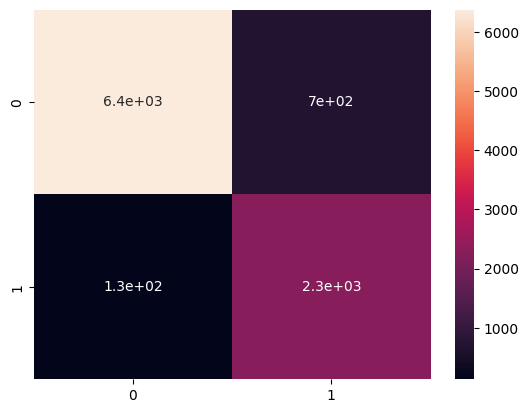

In [41]:
y_predict_test1= svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test1)
sns.heatmap(cm, annot=True)

c:\Users\molbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

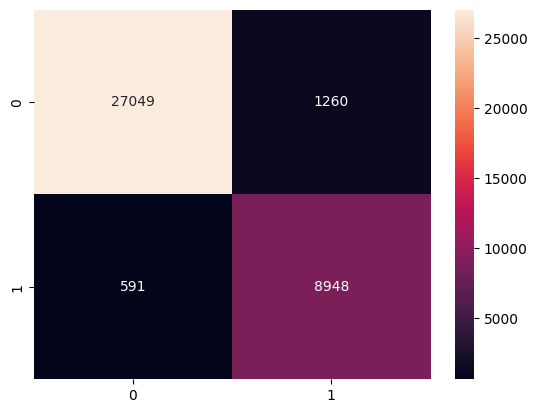

In [42]:
#LinearSVR
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_predict_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")


<Axes: >

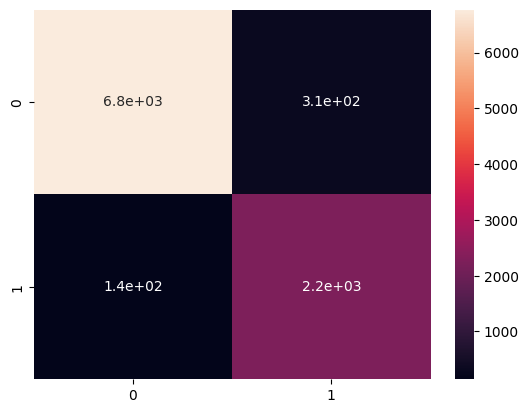

In [43]:
y_pred_test = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred_test)

sns.heatmap(cm, annot=True)

In [44]:
print("LogisticRegression RMSE", np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred= y_pred_test)))

LogisticRegression RMSE 0.21783702571838465


<Axes: >

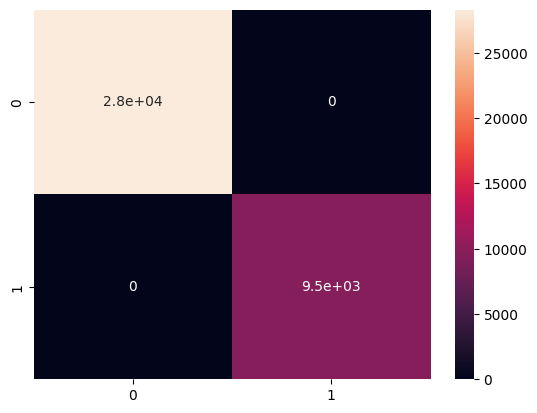

In [45]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_predict_train = decision_tree.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28309
           1       1.00      1.00      1.00      9539

    accuracy                           1.00     37848
   macro avg       1.00      1.00      1.00     37848
weighted avg       1.00      1.00      1.00     37848



<Axes: >

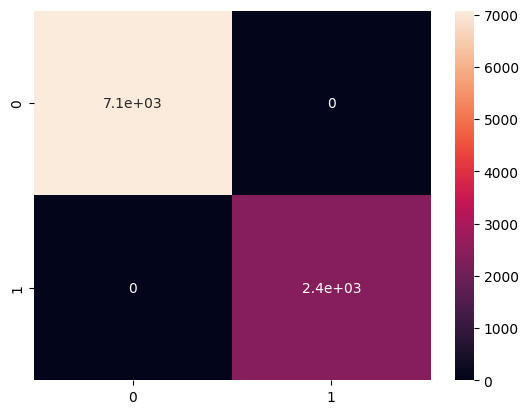

In [47]:
y_predict_test2 = decision_tree.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test2)
sns.heatmap(cm, annot=True)

In [48]:
print("DecisionTreeClassifier RMSE", np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred= y_predict_test2)))

DecisionTreeClassifier RMSE 0.0


In [49]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

<Axes: >

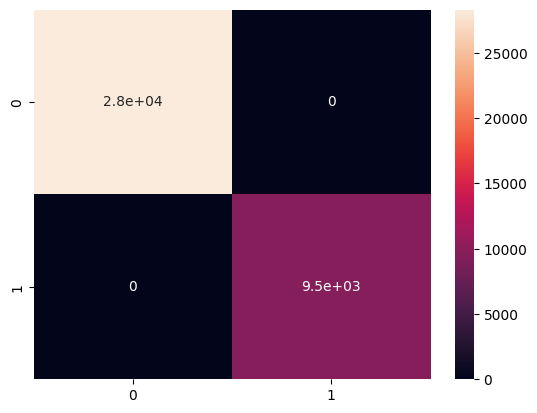

In [50]:
y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

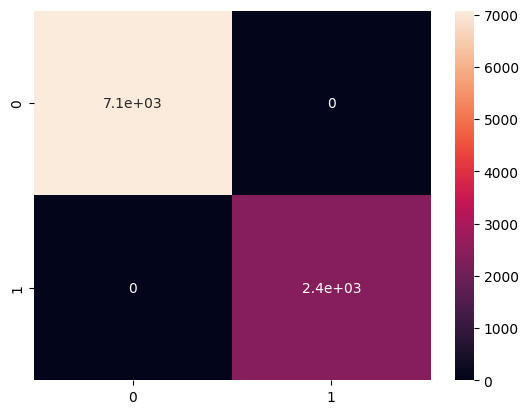

In [51]:
# Predicting the Test set results
y_predict_test3 = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test3)
sns.heatmap(cm, annot=True)

In [52]:
print("DecisionTreeClassifier RMSE", np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred= y_predict_test3)))

DecisionTreeClassifier RMSE 0.0


In [53]:
print(classification_report(y_test, y_predict_test3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7076
           1       1.00      1.00      1.00      2386

    accuracy                           1.00      9462
   macro avg       1.00      1.00      1.00      9462
weighted avg       1.00      1.00      1.00      9462



In [1]:
with open('MODELS/Support_Vector_Machines.pkl', 'wb') as fid:
     pickle.dump(svc_model, fid)

with open('MODELS/LogisticRegression.pkl','wb')as fid:
     pickle.dump(classifier,fid)

with open('MODELS/DecisionTreeRegressor.pkl','wb') as fid:
     pickle.dump(decision_tree,fid)
     
with open('MODELS/RandomForestClassifier.pkl','wb') as fid:
     pickle.dump(RandomForest,fid)

NameError: name 'pickle' is not defined